In [1]:
!pip install numpy
!pip install matplotlib
!pip install scipy
import numpy as np
from scipy.optimize import root, fsolve
import matplotlib.pyplot as plt

# Трансцендентное уравнение

Решаем уравнение:
$$\frac{v^2}{2} - \frac{v_0^2}{2}+ln(\frac{v_0 r_0}{v r}) - (\frac{1}{r} - \frac{1}{r_0}) = 0$$

In [2]:
def func_c(v, r, r0, v0):
    return v**2/2+ np.log((v0*r0**2)/(v*r**2)) - 1/r + 1/r0 - v0**2/2

In [3]:
def solution(r0, v0, r_min, r_max, n):
    """Нахождение корней уравнения
    r0, v0 - граничные условия
    r_min, r_max - начальное и граничное значение r
    """
    for i in range(v0.shape[0]):
        r = np.linspace(r_min, r_max, n)
        crange = range(0, n)
        v1 = [root(func_c, 0.01, args=(r[ci],r0,v0[i])).x[0] for ci in crange]
        v2 = [root(func_c, 1.5, args=(r[ci],r0,v0[i])).x[0] for ci in crange]
        plt.plot(r,v1, color='green')
        plt.plot(r,v2, color='green')
    return r,v1,v2

Строим решение при $r_0=0.5$

C:\Users\Tom\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


<IPython.core.display.Javascript object>


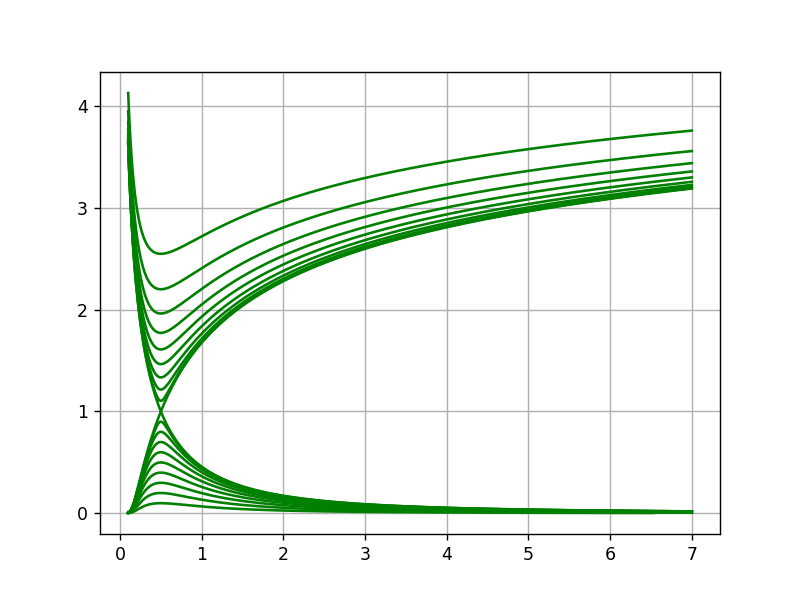

In [4]:
%matplotlib notebook
r0 = 0.5
n = 500
n1= 10
v0 = np.linspace(0.1, 1, n1)
r_min = 0.1
r_max = 7

sol = solution(r0, v0, r_min, r_max, n)
plt.grid()

Решение при $r_0=1$

<IPython.core.display.Javascript object>


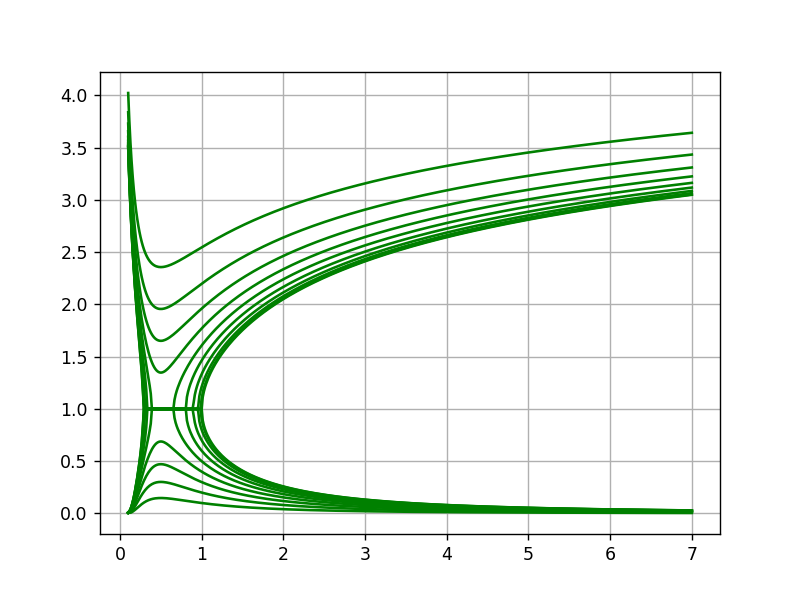

C:\Users\Tom\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [5]:
plt.figure()
r0_1=1
n1=10
sol = solution(r0_1, v0, r_min, r_max, n)
plt.grid()

# Дифференциальное уравнение

## Чтобы график заработал нужно перезапустить ядро (Kernel -> Restart & Run All)

Уравнение: $$\frac{1}{v} \frac{dv}{dr} = \frac{\frac{2a^2}{r} - \frac{GM}{r^2}}{v^2-a^2}$$

(Величины не обезразмерены)

Нужные начальные и граничные условия пока не подобраны, поэтому есть интерактивный график

In [6]:
from ipywidgets import interact

def rk4(f, x0, y0, x1, n, a, gm):
    """Метод Рунге-Кутты"""
    vx = [0] * (n + 1)
    vy = [0] * (n + 1)
    h = (x1 - x0) / float(n)
    vx[0] = x = x0
    vy[0] = y = y0
    for i in range(1, n + 1):
        k1 = h * f(x, y, a, gm)
        k2 = h * f(x + 0.5 * h, y + 0.5 * k1, a, gm)
        k3 = h * f(x + 0.5 * h, y + 0.5 * k2, a, gm)
        k4 = h * f(x + h, y + k3, a, gm)
        vx[i] = x = x0 + i * h
        vy[i] = y = y + (k1 + k2 + k2 + k3 + k3 + k4) / 6
    return vx, vy

def f(r, v, a, GM):
    """Функция"""
    return v*((2*a**2/r - GM/r**2)/(v**2-a**2))

def int_plt(a, gm, v0_min, v0_max, r0, v1):
    """Строим интерактивный график"""
    plt.figure() 
    n1= 5
    v0 = np.linspace(v0_min, v0_max, n1)
    for i in range (n1):
        vx, vy = rk4(f, v0[i], r0, v1, 100, a, gm)
        plt.plot(vx, vy)
    plt.show()
    
interact(int_plt,a=(0,50), gm=(0,50), v0_min=(0,50), v0_max=(0,50), r0=(0,50), v1=(0,50))

interactive(children=(IntSlider(value=25, description='a', max=50), IntSlider(value=25, description='gm', max=…

<function __main__.int_plt(a, gm, v0_min, v0_max, r0, v1)>